In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

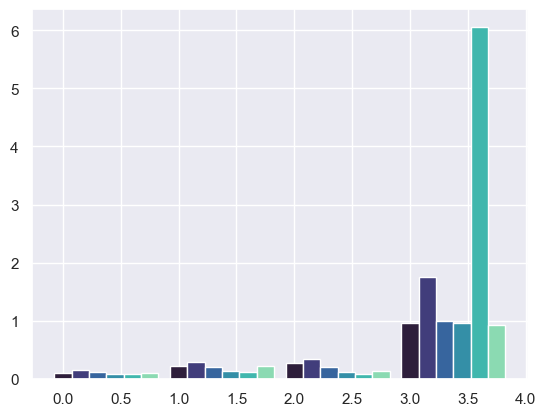

In [28]:
RESULTS_DIR = './results'
tool_results = {}

# List all files in the results directory
files = os.listdir(RESULTS_DIR)

# Read each file and extract the time values for each operation
for file in files:
    file_path = os.path.join(RESULTS_DIR, file)
    tool_name = os.path.splitext(file)[0]
    if 'readme' in tool_name:
        continue

    tool_name = tool_name.replace('-results', '')
    tool_results[tool_name] = {}

    with open(file_path, 'r') as f:
        lines = f.readlines()

        # Extract time values for each operation
        crop_times = [float(time) for time in lines[:10]]
        compress_times = [float(time) for time in lines[10:20]]
        resize_times = [float(time) for time in lines[20:30]]
        convert_times = [float(time) for time in lines[30:40]]

        # Store the time values in the tool_results dictionary
        tool_results[tool_name]['crop'] = crop_times
        tool_results[tool_name]['compress'] = compress_times
        tool_results[tool_name]['resize'] = resize_times
        tool_results[tool_name]['convert'] = convert_times

# create a beautiful plot visualizing the results
fig, ax = plt.subplots()
bar_width = 0.15
index = range(4)

# use a style that is more visually appealing
sns.set()

# Define a color gradient for the bar charts
colors = sns.color_palette('mako', len(tool_results))

for i, (tool, results) in enumerate(tool_results.items()):
    ax.bar(
        [x + i * bar_width for x in index],
        [sum(results['crop']) / 10, sum(results['compress']) / 10, sum(results['resize']) / 10, sum(results['convert']) / 10],
        bar_width,
        label=tool,
        color=colors[i]
    )

ax.set_xlabel('Operation')
ax.set_ylabel('Time (s)')
ax.set_title('Average Time Taken for Each Operation')
ax.set_xticks([x + 1.5 * bar_width for x in index])
ax.set_xticklabels(['Crop', 'Compress', 'Resize', 'Convert'])
ax.legend()

plt.show()
